In [1]:
import numpy as np
from pylab import mpl, plt

In [2]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3 

In [3]:
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [4]:
y = f(x)
y

array([10.66666667,  7.91145833,  5.625     ,  3.77604167,  2.33333333,
        1.265625  ,  0.54166667,  0.13020833,  0.        ,  0.11979167,
        0.45833333,  0.984375  ,  1.66666667,  2.47395833,  3.375     ,
        4.33854167,  5.33333333,  6.328125  ,  7.29166667,  8.19270833,
        9.        ,  9.68229167, 10.20833333, 10.546875  , 10.66666667])

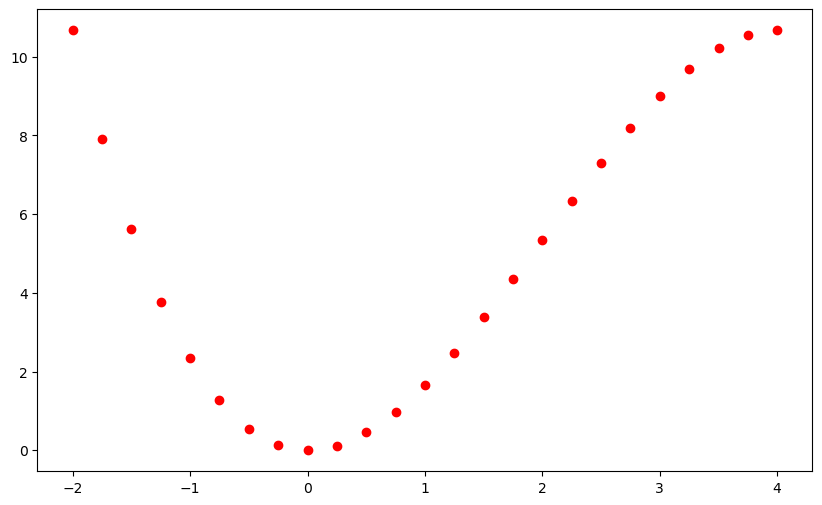

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')

In [6]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

In [7]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [8]:
y_ = alpha + beta * x

In [9]:
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

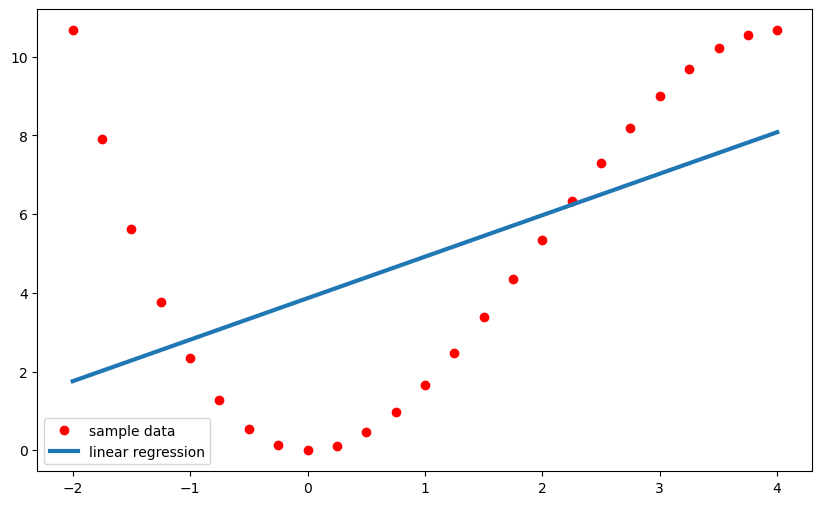

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend();

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


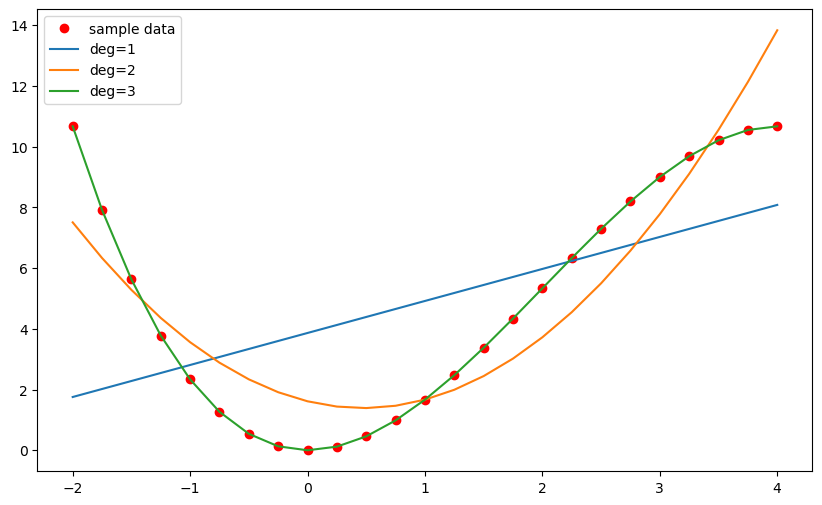

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();


In [12]:
reg

array([-3.33333333e-01,  2.00000000e+00,  3.17114642e-15, -6.98371187e-15])

In [13]:
from sklearn.neural_network import MLPRegressor

In [14]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)

In [15]:
model.fit(x.reshape(-1, 1), y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

In [16]:
y_ = model.predict(x.reshape(-1, 1))

In [17]:
MSE = ((y - y_) ** 2).mean()
MSE

0.011858896820615077

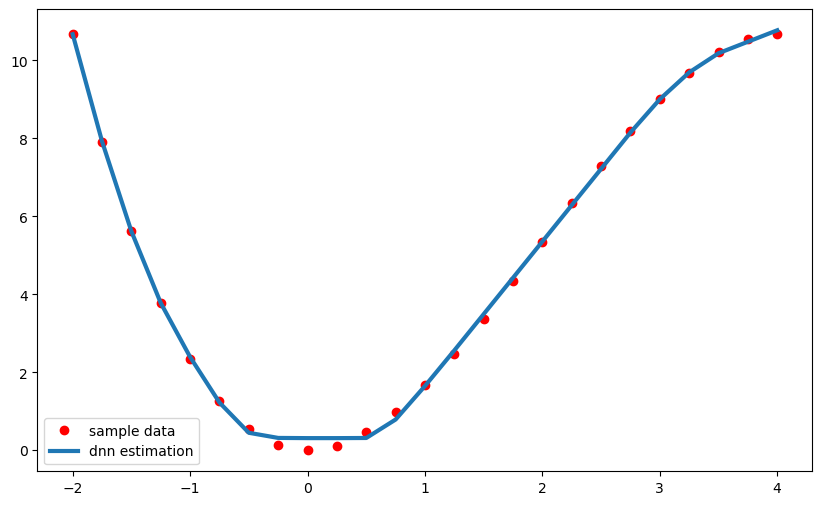

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();

In [20]:
import tensorflow as tf
tf.random.set_seed(100)

In [21]:
from keras.layers import Dense
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')


In [28]:
MSE = ((y - y_) ** 2).mean()
MSE

28.4072839923674

1/1 [==============================] - 0s 72ms/step
round=1 | MSE=2.72051
1/1 [==============================] - 0s 27ms/step
round=2 | MSE=0.63848
1/1 [==============================] - 0s 30ms/step
round=3 | MSE=0.18501
1/1 [==============================] - 0s 34ms/step
round=4 | MSE=0.10882
1/1 [==============================] - 0s 34ms/step
round=5 | MSE=0.08677


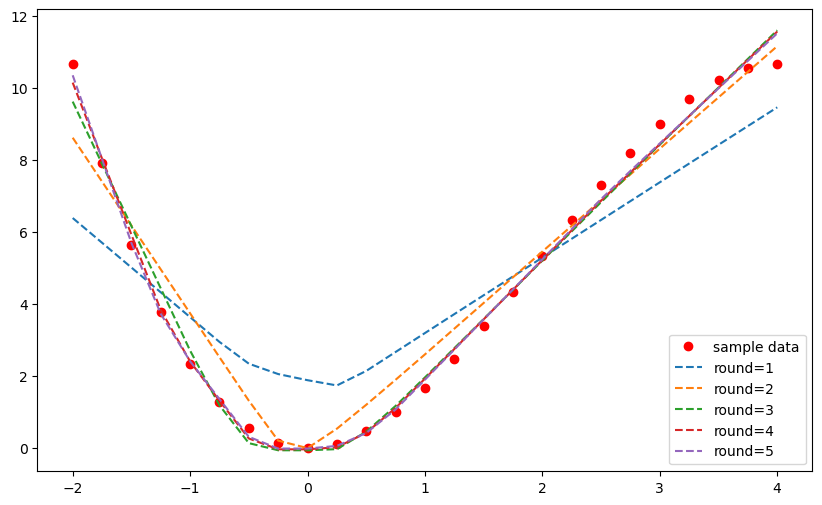

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()